In [12]:
import pathlib
import torch
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt

import sys
sys.path.append("../")

from src.datasets.loader import get_dataset_splits, get_dataloaders

In [5]:
data_dir = pathlib.Path("../data/simulated/migration")
filepaths = sorted(list(data_dir.rglob("*.npz")))

In [3]:
def load_data(filepath):
    data_dict = np.load(filepath, allow_pickle=True)
    graph_timeseries = [data_dict[key].tolist() for key in data_dict.keys() if "g" in key]
    community_timeseries = [data_dict[key] for key in data_dict.keys() if "c" in key]
    label = data_dict["label"]
    return graph_timeseries, community_timeseries, label


def plot_graph(graph, label=None, tick_prop=0.25, ax=None, figsize=(50, 8), **kwargs):
    if isinstance(graph, sp.csr_matrix): 
        graph = graph.toarray()
        graph = (graph + graph.T) / 2
        np.fill_diagonal(graph, 1.0)
        
    if ax is None: _, ax = plt.subplots(figsize=figsize)
        
    ax.imshow(graph, cmap="gray", vmin=graph.min(), vmax=graph.max(), interpolation="none", aspect="equal", **kwargs)

    num_nodes = int(graph.shape[0])
    tick_positions = np.arange(0, num_nodes + 1, num_nodes * tick_prop)
    tick_positions[-1] = num_nodes - 0.5
    tick_labels = np.arange(0, num_nodes + 1, num_nodes * tick_prop).astype(int)
    tick_labels[0] = 1

    ax.set_xticks(tick_positions, minor=False); ax.set_yticks(tick_positions, minor=False)
    ax.set_xticklabels(tick_labels); ax.set_yticklabels(tick_labels)
    ax.set_ylabel("Node"); ax.set_xlabel("Node")


def plot_dynamic_graph(dynamic_graph, nrows=None, ncols=None, figsize=(30, 8), **kwargs):
    nrows = nrows if nrows is not None else 1
    ncols  = ncols if ncols is not None else len(dynamic_graph)
    _, axes = plt.subplots(nrows, ncols, figsize=figsize)
    for idx, (ax, graph) in enumerate(zip(axes.ravel(), dynamic_graph)):
        plot_graph(graph, ax=ax, **kwargs)
        ax.set_title("t={}".format(idx + 1)) 

In [4]:
graph_timeseries1, community_timeseries1, label1 = load_data(filepaths[0])
graph_timeseries2, community_timeseries2, label2 = load_data(filepaths[10])
graph_timeseries3, community_timeseries3, label3 = load_data(filepaths[-1])
assert label1 == label2
assert label1 != label3 and label2 != label3

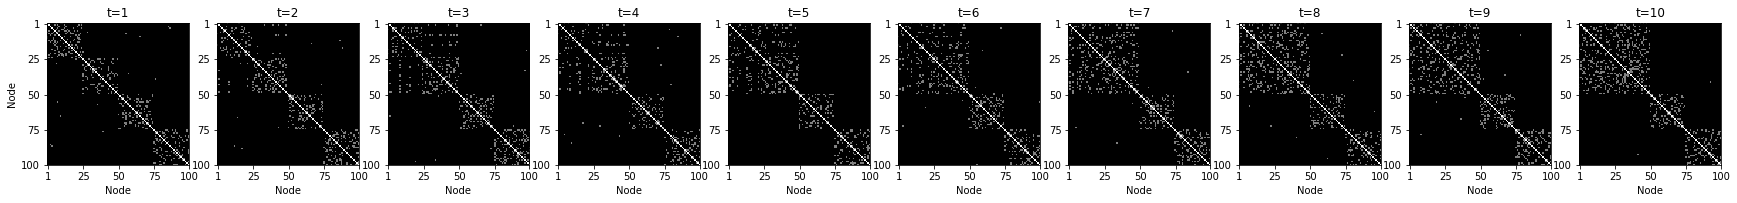

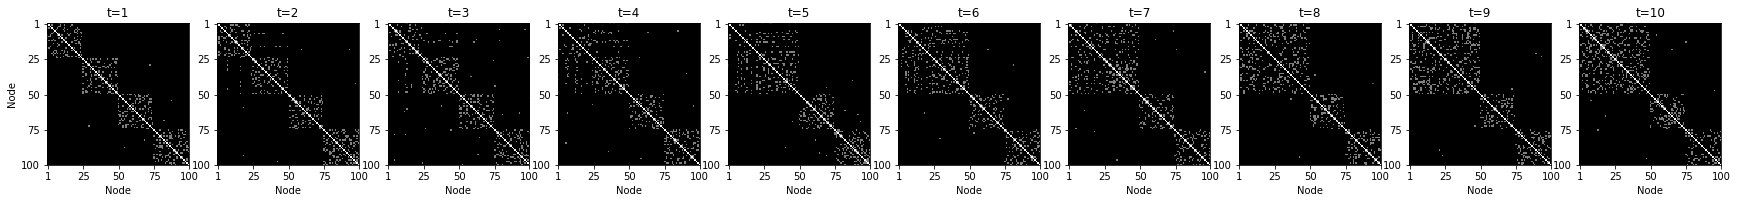

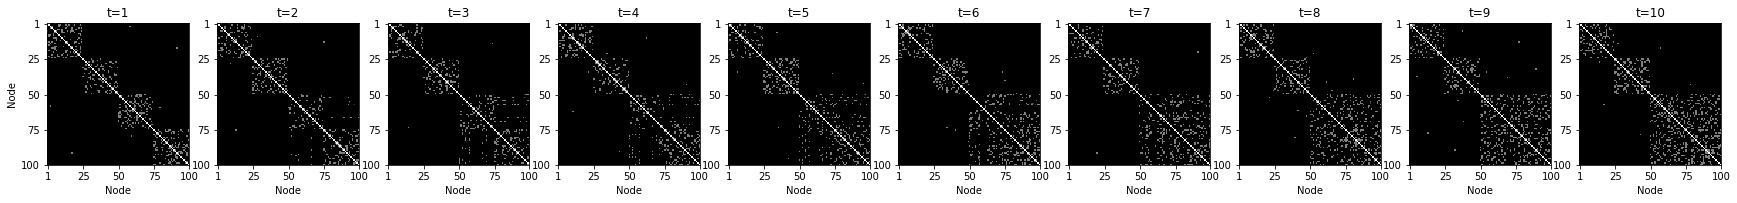

In [5]:
plot_dynamic_graph(graph_timeseries1)
plot_dynamic_graph(graph_timeseries2)
plot_dynamic_graph(graph_timeseries3)

In [33]:
data_dir = pathlib.Path("../data")
name = "simulated_migration"

datasets = get_dataset_splits(name, data_dir, valid_prop=0.10, test_prop=0.10, num_pos_edges=100, num_neg_edges=100, seed=123)
train_sample = datasets["train"][0]

dataloaders = get_dataloaders(name, data_dir, batch_size=32, valid_prop=0.10, test_prop=0.10, num_pos_edges=100, num_neg_edges=100, seed=123, num_workers=8)
train_loader = dataloaders["train"]
train_sample_ = train_loader.dataset[0]

assert torch.equal(train_sample["subject_idx"], train_sample_["subject_idx"])

In [34]:
batch = next(iter(train_loader))
pos_edges = batch["pos_edges"]
pos_edges.shape

torch.Size([32, 10, 100, 2])